In [ ]:
pip install anvil-uplink

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.9 MB/s eta 0:00:00


In [1]:
import anvil.server

anvil.server.connect("server_GFZJ6R3JFEAQB2EYVRSV3ZYM-EN2JVWZL2Z6LZHFK")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


In [12]:
from zipfile import ZipFile
file_name = "/content/hewann.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# === PERSIAPAN DATA ===
# Path ke direktori dataset
train_dir = '/content/hewan/dataset/training_set'
test_dir = '/content/hewan/dataset/test_set'

# Ukuran input gambar
img_width, img_height = 150, 150
batch_size = 32

# ImageDataGenerator untuk augmentasi training dan normalisasi
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load gambar dari direktori
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Ambil jumlah kelas (kelas = nama folder di training_set)
num_classes = len(train_data.class_indices)
# Define the model structure
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Use the num_classes defined earlier
model.add(Dense(num_classes, activation='softmax'))

# Compile the model (Moved to the same cell as model definition for clarity)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, epochs=10, validation_data=test_data)

Found 2655 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.6418 - loss: 0.9313 - val_accuracy: 0.5633 - val_loss: 0.8799
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.6711 - loss: 0.7017 - val_accuracy: 0.5133 - val_loss: 1.0921
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.7521 - loss: 0.5247 - val_accuracy: 0.7267 - val_loss: 0.5510
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.7793 - loss: 0.4744 - val_accuracy: 0.6700 - val_loss: 0.7894
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.7984 - loss: 0.4153 - val_accuracy: 0.7400 - val_loss: 0.5590
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.8242 - loss: 0.3749 - val_accuracy: 0.6600 - val_loss: 0.7605
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8351 - loss: 0.3735 - val_accuracy: 0.6533 - val_loss: 0.9851
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.8422 - loss: 0.3338 - val_accuracy: 0.8000 - v

In [14]:
# Simpan model
model.save('animal_classification_model.h5')
print("✅ Model berhasil disimpan.")

✅ Model berhasil disimpan.


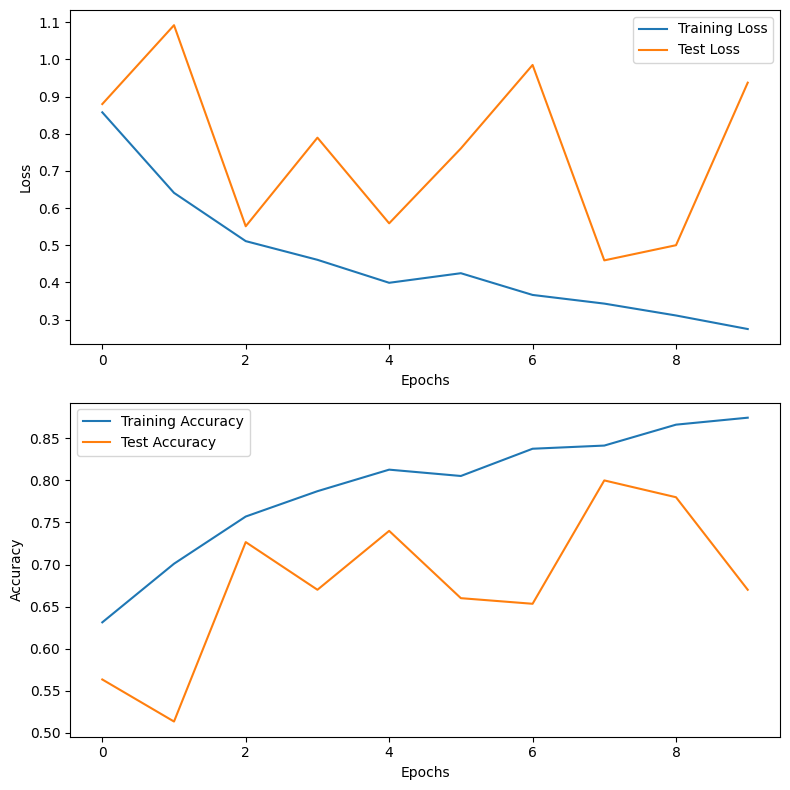

In [15]:
# Mengakses metrik pelatihan dari history
train_loss = history.history['loss']
test_loss = history.history['val_loss']
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

# Visualisasi loss dan akurasi dalam satu gambar dengan subplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Plot loss
ax1.plot(train_loss, label='Training Loss')
ax1.plot(test_loss, label='Test Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot akurasi
ax2.plot(train_acc, label='Training Accuracy')
ax2.plot(test_acc, label='Test Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

In [16]:
# Evaluasi performa model pada data pengujian
test_loss, test_acc = model.evaluate(test_data)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 382ms/step - accuracy: 0.6854 - loss: 0.9405
Test loss: 0.9374539256095886
Test accuracy: 0.6700000166893005


In [17]:
# Mengambil prediksi kelas untuk data validasi
val_predictions = model.predict(test_data)
val_pred_labels = tf.argmax(val_predictions, axis=1)
val_true_labels = test_data.labels

# Menghitung nilai f1-score, recall, presisi, dan confusion matrix
report = classification_report(val_true_labels, val_pred_labels)
print('Classification Report:')
print(report)

conf_matrix = confusion_matrix(val_true_labels, val_pred_labels)
print('Confusion Matrix:')
print(conf_matrix)

10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 528ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.19      0.24       100
           1       0.32      0.29      0.30       100
           2       0.35      0.52      0.42       100

    accuracy                           0.33       300
   macro avg       0.33      0.33      0.32       300
weighted avg       0.33      0.33      0.32       300

Confusion Matrix:
[[19 33 48]
 [21 29 50]
 [19 29 52]]


Saving 15.jpg to 15.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


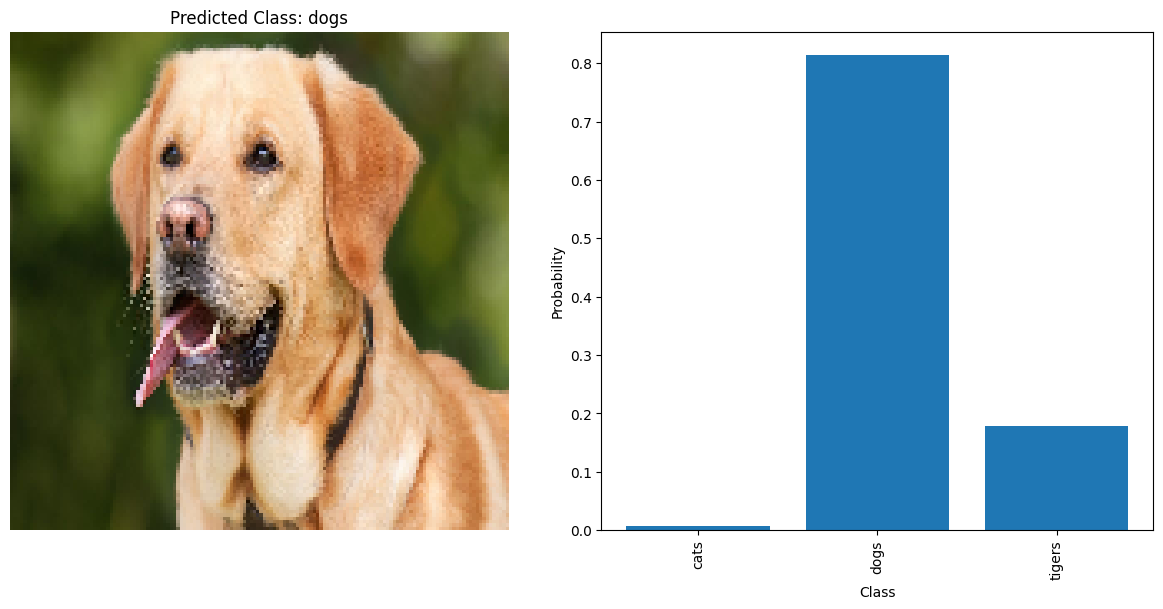

In [18]:
# 11. Fungsi Prediksi Gambar dari Upload
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np # Import numpy here
import os # Import os here

def test_image():
    # Upload file dari lokal
    uploaded = files.upload()

    # Iterate directly over the keys (filenames) of the uploaded dictionary
    for fn in uploaded.keys():
        img_path = fn
        break  # hanya ambil satu gambar pertama

    # Load dan preprocess image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    # Prediksi
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    probabilities = prediction[0]

    # Ambil label kelas dari folder
    class_labels = sorted(os.listdir(train_dir))

    # Tampilkan hasil prediksi
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.imshow(img_array[0])
    ax1.axis('off')
    ax1.set_title('Predicted Class: ' + class_labels[predicted_class])

    ax2.bar(range(len(class_labels)), probabilities)
    ax2.set_xticks(range(len(class_labels)))
    ax2.set_xticklabels(class_labels, rotation=90)
    ax2.set_xlabel('Class')
    ax2.set_ylabel('Probability')

    plt.tight_layout()
    plt.show()

# 12. Jalankan Prediksi Upload Manual
test_image()

In [ ]:
import anvil.server
import base64
from tensorflow.keras.preprocessing import image
import io
import numpy as np
import os
import tensorflow as tf

# Hubungkan ke Anvil
anvil.server.connect("server_GFZJ6R3JFEAQB2EYVRSV3ZYM-EN2JVWZL2Z6LZHFK")

# === MUAT MODEL & LABEL ===
# Load the saved model instead of an image file
try:
    model = tf.keras.models.load_model('animal_classification_model.h5')  # Load the .h5 model file
    train_dir = '/content/hewan/dataset/training_set'  # sesuaikan jika beda
    class_labels = sorted(os.listdir(train_dir))
except Exception as e:
    print(f"Error loading model or class labels for Anvil: {e}")
    model = None
    class_labels = None


@anvil.server.callable
def klasifikasi_hewan(gambar_base64):
    if model is None or class_labels is None:
        return {"error": "Model or class labels failed to load."} # Return an error if loading failed

    img_bytes = base64.b64decode(gambar_base64)
    img = image.load_img(io.BytesIO(img_bytes), target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    # Use the class_labels loaded after the model
    # class_labels = sorted(os.listdir(train_dir)) # No need to redefine here if loaded globally

    hasil = {
        "kelas": class_labels[predicted_index],
        "probabilitas": {
            class_labels[i]: float(prediction[0][i])
            for i in range(len(class_labels))
        }
    }
    return hasil

# Jalankan server Anvil
# Only wait forever if the model was loaded successfully
if model is not None and class_labels is not None:
    print("Anvil server running...")
    anvil.server.wait_forever()
else:
    print("Anvil server not started due to model loading error.")

Anvil server running...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
